In [15]:
!pip install plotly

In [16]:
import pandas as pd
import numpy as np
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt

# Importing the traing and testing set

#### train.csv - Personal records for about two-thirds (~8700) of the passengers, to be used as training data.

- PassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
- HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.
- CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
- Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
- Destination - The planet the passenger will be debarking to.
- Age - The age of the passenger.
- VIP - Whether the passenger has paid for special VIP service during the voyage.
- RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
- Name - The first and last names of the passenger.
- Transported - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.


In [17]:
df_train= pd.read_csv('train.csv', index_col=False)
df_train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


#### test.csv - Personal records for the remaining one-third (~4300) of the passengers, to be used as test data. Your task is to predict the value of Transported for the passengers in this set.

In [18]:
df_test= pd.read_csv('test.csv')
df_test

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


# EDA

In [19]:
df_train.drop(["PassengerId"] , axis = 1 , inplace = True)
df_test.drop(["PassengerId"] , axis = 1 , inplace = True)
TARGET = 'Transported'
FEATURES = [col for col in df_train.columns if col != TARGET]

In [20]:
df = pd.concat([df_train[FEATURES], df_test[FEATURES]], axis=0)
text_features = ["Cabin", "Name"]
cat_features = [col for col in FEATURES if df[col].nunique() < 25 and col not in text_features ]
cont_features = [col for col in FEATURES if df[col].nunique() >= 25 and col not in text_features ]

del df
print(f'\033[94mTotal number of features: {len(FEATURES)}')
print(f'\033[94mNumber of categorical features: {len(cat_features)}')
print(f'\033[94mNumber of continuos features: {len(cont_features)}')
print(f'\033[94mNumber of text features: {len(text_features)}')

labels=['Categorical', 'Continuos', "Text"]
values= [len(cat_features), len(cont_features), len(text_features)]
colors = ['#DE3163', '#58D68D']

fig = go.Figure(data=[go.Pie(
    labels=labels, 
    values=values, pull=[0.1, 0, 0 ],
    marker=dict(colors=colors, 
                line=dict(color='#000000', 
                          width=2))
)])
fig.show()

Total number of features: 12
Number of categorical features: 4
Number of continuos features: 6
Number of text features: 2


In [21]:
train_age = df_train.copy()
test_age = df_test.copy()
train_age["type"] = "Train"
test_age["type"] = "Test"
ageDf = pd.concat([train_age, test_age])
fig = px.histogram(data_frame = ageDf, 
                   x="Age",
                   color= "type",
                   color_discrete_sequence =  ['#58D68D','#DE3163'],
                   marginal="box",
                   nbins= 100,
                    template="plotly_white"
                )
fig.update_layout(title = "Distribution of Age" , title_x = 0.5)
fig.show()

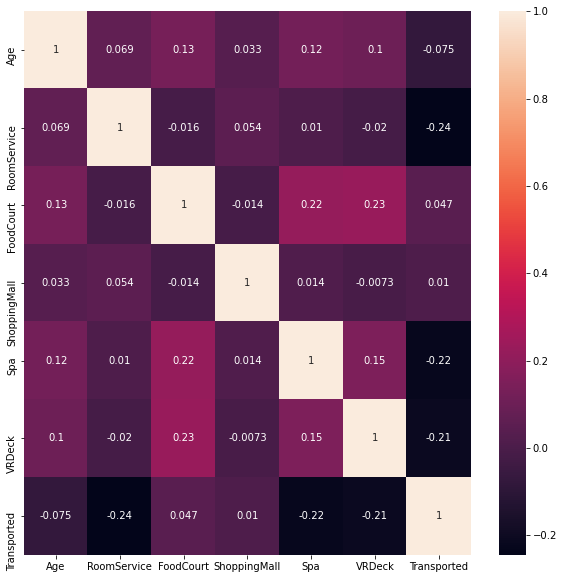

In [22]:
#Using Pearson Correlation
plt.figure(figsize=(10,10))
cor = df_train.corr()
sns.heatmap(cor, annot=True)
plt.show()

# Exploring Train data

📌  Observations in Train Data:
* There are total of 14 columns and 8693 rows in train data.
* Train data contains 119378 observation with 2324 missing values.
* All 12 feature columns have missing values in them with CryoSleep having highest missing values (217)
* Transported is the target variable which is only available in the train dataset.

In [23]:
df_train[['deck', 'number', 'side']]= df_train["Cabin"].str.split("/", expand = True)
df_train = df_train.drop(columns =["deck","number"])
df_train

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,side
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,P
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,S
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,S
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,S
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,P
8689,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,S
8690,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,S
8691,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,S


In [24]:
#df_train.info()
df_train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [25]:
print("Number missing values in train data:" , df_train.isna().sum().sum())
print(df_train.isna().sum().sort_values(ascending = False))
df_train= df_train.dropna()

Number missing values in train data: 2523
CryoSleep       217
ShoppingMall    208
VIP             203
HomePlanet      201
Name            200
side            199
Cabin           199
VRDeck          188
Spa             183
FoodCourt       183
Destination     182
RoomService     181
Age             179
Transported       0
dtype: int64


In [26]:
df_train.columns

Index(['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age', 'VIP',
       'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Name',
       'Transported', 'side'],
      dtype='object')

In [27]:
print(df_train.CryoSleep.unique())
print(df_train.HomePlanet.unique())
print(df_train.Destination.unique())
print(df_train.Transported.unique())
print(df_train.VIP.unique())

[False True]
['Europa' 'Earth' 'Mars']
['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e']
[False  True]
[False True]


In [28]:
from sklearn.preprocessing import LabelEncoder

l1 = LabelEncoder()
df_train[['CryoSleep','Transported','VIP', 'side']] = df_train[['CryoSleep','Transported','VIP', 'side']].apply(l1.fit_transform)
df_train= pd.concat([df_train, pd.get_dummies(df_train['HomePlanet'])], axis=1)
df_train= pd.concat([df_train, pd.get_dummies(df_train['Destination'])], axis=1)
df_train= df_train.drop('Name',axis=1)
df_train

/Users/sidorela/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:2963: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,side,Earth,Europa,Mars,55 Cancri e,PSO J318.5-22,TRAPPIST-1e
0,Europa,0,B/0/P,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0,0,0,1
1,Earth,0,F/0/S,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,1,1,1,0,0,0,0,1
2,Europa,0,A/0/S,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,1,0,1,0,0,0,1
3,Europa,0,A/0/S,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,1,0,1,0,0,0,1
4,Earth,0,F/1/S,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0,1,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,0,A/98/P,55 Cancri e,41.0,1,0.0,6819.0,0.0,1643.0,74.0,0,0,0,1,0,1,0,0
8689,Earth,1,G/1499/S,PSO J318.5-22,18.0,0,0.0,0.0,0.0,0.0,0.0,0,1,1,0,0,0,1,0
8690,Earth,0,G/1500/S,TRAPPIST-1e,26.0,0,0.0,0.0,1872.0,1.0,0.0,1,1,1,0,0,0,0,1
8691,Europa,0,E/608/S,55 Cancri e,32.0,0,0.0,1049.0,0.0,353.0,3235.0,0,1,0,1,0,1,0,0


In [29]:
df_train.columns

Index(['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age', 'VIP',
       'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Transported', 'side', 'Earth', 'Europa', 'Mars', '55 Cancri e',
       'PSO J318.5-22', 'TRAPPIST-1e'],
      dtype='object')

📌  Observations in Null Value Distribution :
* There are two target values - 0 and 1.
* Both the target values are almost equally distributed.

In [30]:
target_df = pd.DataFrame(df_train[TARGET].value_counts()).reset_index()
target_df.columns = [TARGET, 'count']
fig = px.bar(data_frame =target_df, 
             x = TARGET,
             y = 'count'
            ) 
fig.update_traces(marker_color =['#58D68D','#DE3163'], 
                  marker_line_color='rgb(0,0,0)',
                  marker_line_width=2,)
fig.update_layout(title = "Target Distribution",
                  template = "plotly_white",
                  title_x = 0.5)
print("\033[94mPercentage of Transported = 0: {:.2f} %".format(target_df["count"][0] *100 / df_train.shape[0]))
print("\033[94mPercentage of Transported = 1: {:.2f} %".format(target_df["count"][1]* 100 / df_train.shape[0]))
fig.show()

Percentage of Transported = 0: 50.36 %
Percentage of Transported = 1: 49.64 %


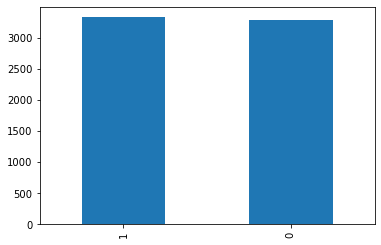

In [31]:
df_train['Transported'].value_counts().plot(kind='bar');

<ipython-input-32-3acfea263845>:6: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



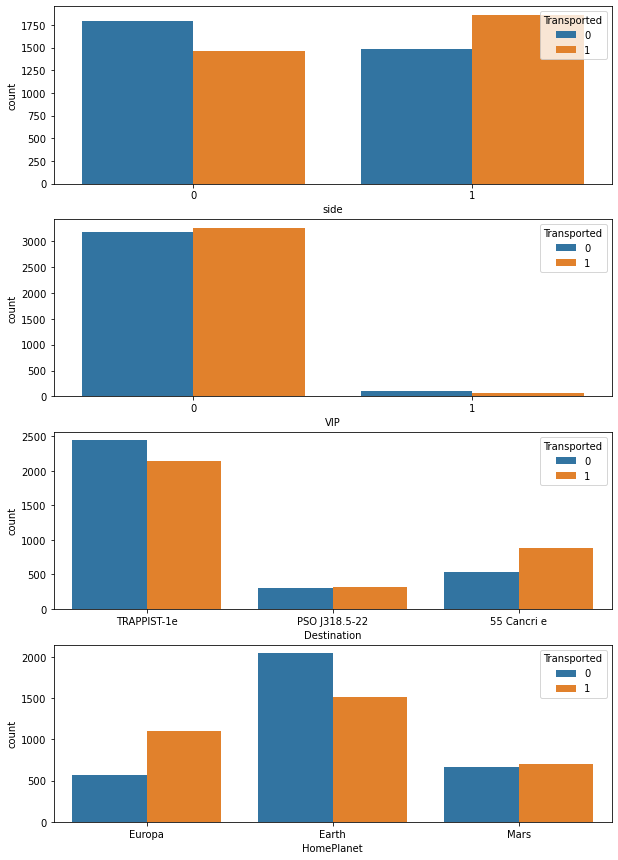

In [32]:
fig, ax = plt.subplots(nrows=4, figsize=(10,15))
ax0 = sns.countplot(x="side", hue="Transported", data=df_train,ax=ax[0])
ax1= sns.countplot(x="VIP", hue="Transported", data=df_train,ax=ax[1])
ax2= sns.countplot(x="Destination", hue="Transported", data=df_train,ax=ax[2])
ax3= sns.countplot(x="HomePlanet", hue="Transported", data=df_train,ax=ax[3])
fig.show()

#   Exploring Test data

📌  Observations in Test Data:
* There are total of 13 columns and 4277 rows in test data.
* Train data contains 54484 observation with 1117 missing values.
* All 12 feature columns have missing values in them with FoodCourt having highest missing values (106)

In [33]:
print(df_test.isna().sum().sum())
print(df_test.isna().sum().sort_values(ascending = False))
#df_test= df_test.dropna()
#print(df_test.columns)

1117
FoodCourt       106
Spa             101
Cabin           100
ShoppingMall     98
Name             94
VIP              93
CryoSleep        93
Destination      92
Age              91
HomePlanet       87
RoomService      82
VRDeck           80
dtype: int64


In [34]:
# Columns with missing values
na_cols=df_test.columns[df_test.isna().any()].tolist()

# Missing values summary
mv=pd.DataFrame(df_test[na_cols].isna().sum(), columns=['Number_missing'])
mv['Percentage_missing']=np.round(100*mv['Number_missing']/len(df_test),2)
mv

,Number_missing,Percentage_missing
HomePlanet,87,2.03
CryoSleep,93,2.17
Cabin,100,2.34
Destination,92,2.15
Age,91,2.13
VIP,93,2.17
RoomService,82,1.92
FoodCourt,106,2.48
ShoppingMall,98,2.29
Spa,101,2.36


In [ ]:
'''
# Substituting nan values for training set

imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
train_df[['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP']] = \
    imp.fit_transform(train_df[['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP']])

imp = SimpleImputer(missing_values=np.nan, strategy='median')
train_df[['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']] = \
    imp.fit_transform(train_df[['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']])

train_df = train_df.drop('Name', axis=1)

# Substituting nan values for testing set

imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
test_df[['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP']] = \
    imp.fit_transform(test_df[['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP']])

imp = SimpleImputer(missing_values=np.nan, strategy='median')
test_df[['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']] = \
    imp.fit_transform(test_df[['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']])

test_df = test_df.drop('Name', axis=1)

'''

In [35]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(fill_value=np.nan, strategy='most_frequent')
X = imputer.fit_transform(df_test)

#Because it returns a numpy array, to read it, we can convert it back to the data frame.
X = pd.DataFrame(X, columns=df_test.columns)
print(X)

#We can confirm it by
X.isna().sum()

     HomePlanet CryoSleep     Cabin    Destination Age    VIP RoomService  \
0         Earth      True     G/3/S    TRAPPIST-1e  27  False           0   
1         Earth     False     F/4/S    TRAPPIST-1e  19  False           0   
2        Europa      True     C/0/S    55 Cancri e  31  False           0   
3        Europa     False     C/1/S    TRAPPIST-1e  38  False           0   
4         Earth     False     F/5/S    TRAPPIST-1e  20  False          10   
...         ...       ...       ...            ...  ..    ...         ...   
4272      Earth      True  G/1496/S    TRAPPIST-1e  34  False           0   
4273      Earth     False   G/160/P    TRAPPIST-1e  42  False           0   
4274       Mars      True   D/296/P    55 Cancri e  18  False           0   
4275     Europa     False   D/297/P    TRAPPIST-1e  18  False           0   
4276      Earth      True  G/1498/S  PSO J318.5-22  43  False           0   

     FoodCourt ShoppingMall   Spa VRDeck              Name  
0            0

HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
dtype: int64

In [36]:
X[['deck', 'number', 'side']]= X["Cabin"].str.split("/", expand = True)
X = X.drop(columns =["deck","number"])
X

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,side
0,Earth,True,G/3/S,TRAPPIST-1e,27,False,0,0,0,0,0,Nelly Carsoning,S
1,Earth,False,F/4/S,TRAPPIST-1e,19,False,0,9,0,2823,0,Lerome Peckers,S
2,Europa,True,C/0/S,55 Cancri e,31,False,0,0,0,0,0,Sabih Unhearfus,S
3,Europa,False,C/1/S,TRAPPIST-1e,38,False,0,6652,0,181,585,Meratz Caltilter,S
4,Earth,False,F/5/S,TRAPPIST-1e,20,False,10,0,635,0,0,Brence Harperez,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,Earth,True,G/1496/S,TRAPPIST-1e,34,False,0,0,0,0,0,Jeron Peter,S
4273,Earth,False,G/160/P,TRAPPIST-1e,42,False,0,847,17,10,144,Matty Scheron,P
4274,Mars,True,D/296/P,55 Cancri e,18,False,0,0,0,0,0,Jayrin Pore,P
4275,Europa,False,D/297/P,TRAPPIST-1e,18,False,0,2680,0,0,523,Kitakan Conale,P


In [37]:
print(X.CryoSleep.unique())
print(X.side.unique())
print(X.VIP.unique())

[True False]
['S' 'P']
[False True]


In [38]:
from sklearn.preprocessing import LabelEncoder

l1 = LabelEncoder()
X[['CryoSleep','VIP','side']] = X[['CryoSleep','VIP','side']].apply(l1.fit_transform)

X= pd.concat([X, pd.get_dummies(X['HomePlanet'])], axis=1)
X= pd.concat([X, pd.get_dummies(X['Destination'])], axis=1)
X= X.drop("Name", axis=1)
X

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,side,Earth,Europa,Mars,55 Cancri e,PSO J318.5-22,TRAPPIST-1e
0,Earth,1,G/3/S,TRAPPIST-1e,27,0,0,0,0,0,0,1,1,0,0,0,0,1
1,Earth,0,F/4/S,TRAPPIST-1e,19,0,0,9,0,2823,0,1,1,0,0,0,0,1
2,Europa,1,C/0/S,55 Cancri e,31,0,0,0,0,0,0,1,0,1,0,1,0,0
3,Europa,0,C/1/S,TRAPPIST-1e,38,0,0,6652,0,181,585,1,0,1,0,0,0,1
4,Earth,0,F/5/S,TRAPPIST-1e,20,0,10,0,635,0,0,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,Earth,1,G/1496/S,TRAPPIST-1e,34,0,0,0,0,0,0,1,1,0,0,0,0,1
4273,Earth,0,G/160/P,TRAPPIST-1e,42,0,0,847,17,10,144,0,1,0,0,0,0,1
4274,Mars,1,D/296/P,55 Cancri e,18,0,0,0,0,0,0,0,0,0,1,1,0,0
4275,Europa,0,D/297/P,TRAPPIST-1e,18,0,0,2680,0,0,523,0,0,1,0,0,0,1


# Modeling

In [39]:
#!pip install xgboost

In [40]:
#!brew install libomp

In [41]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV


In [42]:
X_train= df_train.drop(['Transported', 'HomePlanet','Cabin', 'Destination','Cabin'] ,axis= 1)
y_train= df_train['Transported']

In [43]:
X_train= X_train.reset_index(drop=True)
X_train

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,side,Earth,Europa,Mars,55 Cancri e,PSO J318.5-22,TRAPPIST-1e
0,0,39.0,0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0,1
1,0,24.0,0,109.0,9.0,25.0,549.0,44.0,1,1,0,0,0,0,1
2,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,1,0,1,0,0,0,1
3,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,1,0,1,0,0,0,1
4,0,16.0,0,303.0,70.0,151.0,565.0,2.0,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6601,0,41.0,1,0.0,6819.0,0.0,1643.0,74.0,0,0,1,0,1,0,0
6602,1,18.0,0,0.0,0.0,0.0,0.0,0.0,1,1,0,0,0,1,0
6603,0,26.0,0,0.0,0.0,1872.0,1.0,0.0,1,1,0,0,0,0,1
6604,0,32.0,0,0.0,1049.0,0.0,353.0,3235.0,1,0,1,0,1,0,0


In [44]:
X_test= X.drop(['HomePlanet','Cabin', 'Destination','Cabin'] ,axis= 1).reset_index(drop=True)
X_test

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,side,Earth,Europa,Mars,55 Cancri e,PSO J318.5-22,TRAPPIST-1e
0,1,27,0,0,0,0,0,0,1,1,0,0,0,0,1
1,0,19,0,0,9,0,2823,0,1,1,0,0,0,0,1
2,1,31,0,0,0,0,0,0,1,0,1,0,1,0,0
3,0,38,0,0,6652,0,181,585,1,0,1,0,0,0,1
4,0,20,0,10,0,635,0,0,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,1,34,0,0,0,0,0,0,1,1,0,0,0,0,1
4273,0,42,0,0,847,17,10,144,0,1,0,0,0,0,1
4274,1,18,0,0,0,0,0,0,0,0,0,1,1,0,0
4275,0,18,0,0,2680,0,0,523,0,0,1,0,0,0,1


### GridSearchCV with RandomForestClassifier

In [45]:
parameters = {
    "n_estimators": [5, 10, 15, 20, 25], 
    "max_depth": [3, 5, 7, 9, 11, 12],
    "min_samples_leaf" : [18, 19, 20],
    "min_samples_split" : [8, 9, 10]
}


RFC_Model = RandomForestClassifier()
RFC_grid = GridSearchCV(RFC_Model, param_grid = parameters, cv = 5, scoring = 'accuracy')
RFC_grid.fit(X_train, y_train)
print('Best Parameters : ', RFC_grid.best_params_)
print()
print('Best Accuracy : ', RFC_grid.best_score_)

Best Parameters :  {'max_depth': 12, 'min_samples_leaf': 18, 'min_samples_split': 9, 'n_estimators': 25}

Best Accuracy :  0.7998810097791866


In [46]:
rf = RandomForestClassifier(max_depth= 12, min_samples_leaf= 18, min_samples_split= 9, n_estimators= 25)
rf.fit(X_train,y_train)
y_pred_rf = rf.predict(X_test)
y_pred_rf 

array([1, 0, 1, ..., 1, 1, 1])

### GridSearchCV with XGBClassifier

In [47]:
'''param_grid = {'n_estimators': [10, 25, 50, 75, 100],
              'learning_rate': [0.2, 0.15, 0.1, 0.05],
              'eval_metric': ['mlogloss']}
grid = GridSearchCV(XGBClassifier(), param_grid=param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)
best_params = grid.best_params_
print('Best score of cross validation: {:.2f}'.format(grid.best_score_))
print('Best parameters:', best_params)'''


"param_grid = {'n_estimators': [10, 25, 50, 75, 100],\n              'learning_rate': [0.2, 0.15, 0.1, 0.05],\n              'eval_metric': ['mlogloss']}\ngrid = GridSearchCV(XGBClassifier(), param_grid=param_grid, cv=5, scoring='accuracy')\ngrid.fit(X_train, y_train)\nbest_params = grid.best_params_\nprint('Best score of cross validation: {:.2f}'.format(grid.best_score_))\nprint('Best parameters:', best_params)"

In [48]:
'''xgb= XGBClassifier(eval_metric= 'mlogloss', learning_rate = 0.1, n_estimators= 100)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
y_pred_xgb'''

"xgb= XGBClassifier(eval_metric= 'mlogloss', learning_rate = 0.1, n_estimators= 100)\nxgb.fit(X_train, y_train)\ny_pred_xgb = xgb.predict(X_test)\ny_pred_xgb"

# Submission

In [49]:
submission = pd.read_csv('sample_submission.csv')
#submission= submission.set_index('PassengerId')
submission

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,False
3,0021_01,False
4,0023_01,False
...,...,...
4272,9266_02,False
4273,9269_01,False
4274,9271_01,False
4275,9273_01,False


In [54]:
submission['Transported'] = y_pred_rf
submission=submission.replace({0:False, 1:True})
submission= submission.set_index('PassengerId')
submission

,Transported
PassengerId,
0013_01,True
0018_01,False
0019_01,True
0021_01,True
0023_01,False
...,...
9266_02,True
9269_01,False
9271_01,True


Text(0.5, 1.0, 'Prediction distribution')

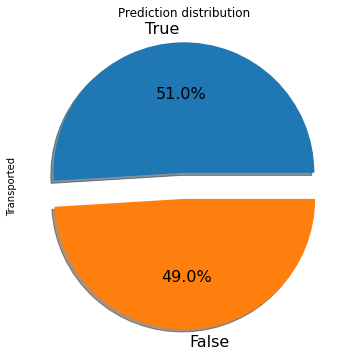

In [55]:
# Prediction distribution
plt.figure(figsize=(6,6))
submission['Transported'].value_counts().plot.pie(explode=[0.1,0.1], autopct='%1.1f%%', shadow=True, textprops={'fontsize':16}).set_title("Prediction distribution")

In [58]:
# Output to csv
submission.to_csv("submission.csv")